In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

Update end date below to the previous day's date

In [21]:
x = pd.date_range(start='4/12/2020', end='9/09/2021')
#x = pd.date_range(start='7/12/2021', end='9/08/2021')

In [22]:
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

In [23]:
df_jhu_us_dict= {}
for y in range(len(date_list)):
    url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/' + date_list[y] + r'.csv'
    df_jhu_us_dict[date_list[y]] = pd.read_csv(url_value,header=0)
    df_jhu_us_dict[date_list[y]]['dt_date'] = dt_date_list[y]
  #  df_jhu_us_dict[date_list[y]].set_index(['Province_State'],  inplace=True)
    print(date_list[y])

04-12-2020
04-13-2020
04-14-2020
04-15-2020
04-16-2020
04-17-2020
04-18-2020
04-19-2020
04-20-2020
04-21-2020
04-22-2020
04-23-2020
04-24-2020
04-25-2020
04-26-2020
04-27-2020
04-28-2020
04-29-2020
04-30-2020
05-01-2020
05-02-2020
05-03-2020
05-04-2020
05-05-2020
05-06-2020
05-07-2020
05-08-2020
05-09-2020
05-10-2020
05-11-2020
05-12-2020
05-13-2020
05-14-2020
05-15-2020
05-16-2020
05-17-2020
05-18-2020
05-19-2020
05-20-2020
05-21-2020
05-22-2020
05-23-2020
05-24-2020
05-25-2020
05-26-2020
05-27-2020
05-28-2020
05-29-2020
05-30-2020
05-31-2020
06-01-2020
06-02-2020
06-03-2020
06-04-2020
06-05-2020
06-06-2020
06-07-2020
06-08-2020
06-09-2020
06-10-2020
06-11-2020
06-12-2020
06-13-2020
06-14-2020
06-15-2020
06-16-2020
06-17-2020
06-18-2020
06-19-2020
06-20-2020
06-21-2020
06-22-2020
06-23-2020
06-24-2020
06-25-2020
06-26-2020
06-27-2020
06-28-2020
06-29-2020
06-30-2020
07-01-2020
07-02-2020
07-03-2020
07-04-2020
07-05-2020
07-06-2020
07-07-2020
07-08-2020
07-09-2020
07-10-2020
07-11-2020

In [24]:
aaa = df_jhu_us_dict[date_list[0]].loc[df_jhu_us_dict[date_list[0]].Province_State == 'Texas', ['Province_State','Confirmed', 'Deaths', 'dt_date']]
for d_value in date_list[1:]:
    aaa = aaa.append(df_jhu_us_dict[d_value].loc[df_jhu_us_dict[d_value].Province_State == 'Texas', ['Province_State','Confirmed', 'Deaths', 'dt_date']])

In [25]:
aaa

,Province_State,Confirmed,Deaths,dt_date
47,Texas,13780,306,2020-04-12
49,Texas,14328,337,2020-04-13
49,Texas,15088,363,2020-04-14
49,Texas,16044,406,2020-04-15
49,Texas,16985,440,2020-04-16
...,...,...,...,...
49,Texas,3703715,58420,2021-09-05
49,Texas,3708013,58467,2021-09-06
49,Texas,3727663,58638,2021-09-07
49,Texas,3768545,58927,2021-09-08


In [26]:
bbb = aaa.loc[:,['dt_date','Confirmed']]

In [27]:
bbb

,dt_date,Confirmed
47,2020-04-12,13780
49,2020-04-13,14328
49,2020-04-14,15088
49,2020-04-15,16044
49,2020-04-16,16985
...,...,...
49,2021-09-05,3703715
49,2021-09-06,3708013
49,2021-09-07,3727663
49,2021-09-08,3768545


In [28]:
ccc = bbb.set_index('dt_date')

In [29]:
ccc

,Confirmed
dt_date,
2020-04-12,13780
2020-04-13,14328
2020-04-14,15088
2020-04-15,16044
2020-04-16,16985
...,...
2021-09-05,3703715
2021-09-06,3708013
2021-09-07,3727663


In [30]:
ddd = ccc.diff(periods = 1)

In [31]:
ddd

,Confirmed
dt_date,
2020-04-12,NaN
2020-04-13,548.0
2020-04-14,760.0
2020-04-15,956.0
2020-04-16,941.0
...,...
2021-09-05,2691.0
2021-09-06,4298.0
2021-09-07,19650.0


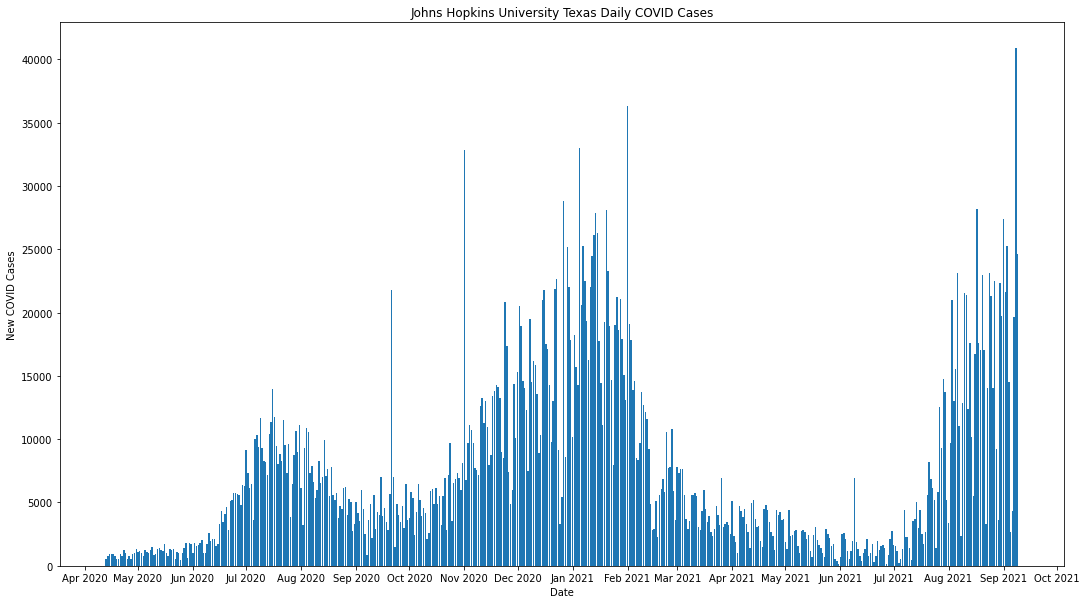

In [54]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('Johns Hopkins University Texas Daily COVID Cases')
plt.xlabel('Date',color='black')
plt.ylabel('New COVID Cases',color='black')
plt.bar(ddd.index,ddd.Confirmed)
fig.savefig('JHUDailyTexasNew.png')